# **Time Series Analysis: Adjusted Closing Prices of Stocks**

In [ ]:
from google.colab import files
#Upload the data file to Colab
uploaded = files.upload()


Saving ML2_Final_Project.xlsx to ML2_Final_Project.xlsx


# **Time Series Data**

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

# Data File Path
file_path = '/content/ML2_Final_Project.xlsx'

# Load historical stock price data
stock_data = pd.read_excel(file_path)

print(stock_data.info())
stock_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1258 non-null   object 
 1   Open         1258 non-null   float64
 2   High         1258 non-null   float64
 3   Low          1258 non-null   float64
 4   Close*       1258 non-null   float64
 5   Adj Close**  1258 non-null   float64
 6   Volume       1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB
None


,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Apr 28, 2023",33797.43,34104.56,33728.40,34098.16,34098.16,354310000
1,"Apr 27, 2023",33381.66,33859.75,33374.65,33826.16,33826.16,343240000
2,"Apr 26, 2023",33596.34,33645.83,33235.85,33301.87,33301.87,321170000
3,"Apr 25, 2023",33828.34,33875.49,33525.39,33530.83,33530.83,297880000
4,"Apr 24, 2023",33805.04,33891.15,33726.09,33875.40,33875.40,252020000
5,"Apr 21, 2023",33793.60,33858.83,33688.57,33808.96,33808.96,291080000
6,"Apr 20, 2023",33740.60,33875.39,33677.74,33786.62,33786.62,307910000
7,"Apr 19, 2023",33889.83,33957.98,33814.65,33897.01,33897.01,251490000
8,"Apr 18, 2023",33965.16,34018.62,33791.89,33976.63,33976.63,253570000
9,"Apr 17, 2023",33930.46,33991.23,33796.91,33987.18,33987.18,234530000


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Converting column names to camel case style and ensuring the date column is in datetime format for consistency**




In [ ]:
# Rename columns using Camel Style
print(stock_data.columns)

stock_data.columns = [
    ''.join(word.capitalize() if i != 0 else word.lower() for i, word in enumerate(col.replace('-', ' ').replace('_', ' ').replace('*', ' ').split()))
    for col in stock_data.columns]

print(stock_data.columns)

# Convert the 'date' column to datetime format
stock_data['date'] = pd.to_datetime(stock_data['date'])
print(stock_data.info())

# Set the 'date' column as the index
stock_data.set_index('date', inplace=True)

stock_data.head(10)


Index(['Date', 'Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume'], dtype='object')
Index(['date', 'open', 'high', 'low', 'close', 'adjClose', 'volume'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      1258 non-null   datetime64[ns]
 1   open      1258 non-null   float64       
 2   high      1258 non-null   float64       
 3   low       1258 non-null   float64       
 4   close     1258 non-null   float64       
 5   adjClose  1258 non-null   float64       
 6   volume    1258 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.9 KB
None


,open,high,low,close,adjClose,volume
date,,,,,,
2023-04-28,33797.43,34104.56,33728.40,34098.16,34098.16,354310000
2023-04-27,33381.66,33859.75,33374.65,33826.16,33826.16,343240000
2023-04-26,33596.34,33645.83,33235.85,33301.87,33301.87,321170000
2023-04-25,33828.34,33875.49,33525.39,33530.83,33530.83,297880000
2023-04-24,33805.04,33891.15,33726.09,33875.40,33875.40,252020000
2023-04-21,33793.60,33858.83,33688.57,33808.96,33808.96,291080000
2023-04-20,33740.60,33875.39,33677.74,33786.62,33786.62,307910000
2023-04-19,33889.83,33957.98,33814.65,33897.01,33897.01,251490000
2023-04-18,33965.16,34018.62,33791.89,33976.63,33976.63,253570000


# **1. Exploratory Data Analysis (EDA)**

# **1.1 Visualizing the Adjusted Closing Prices Time Series Data**


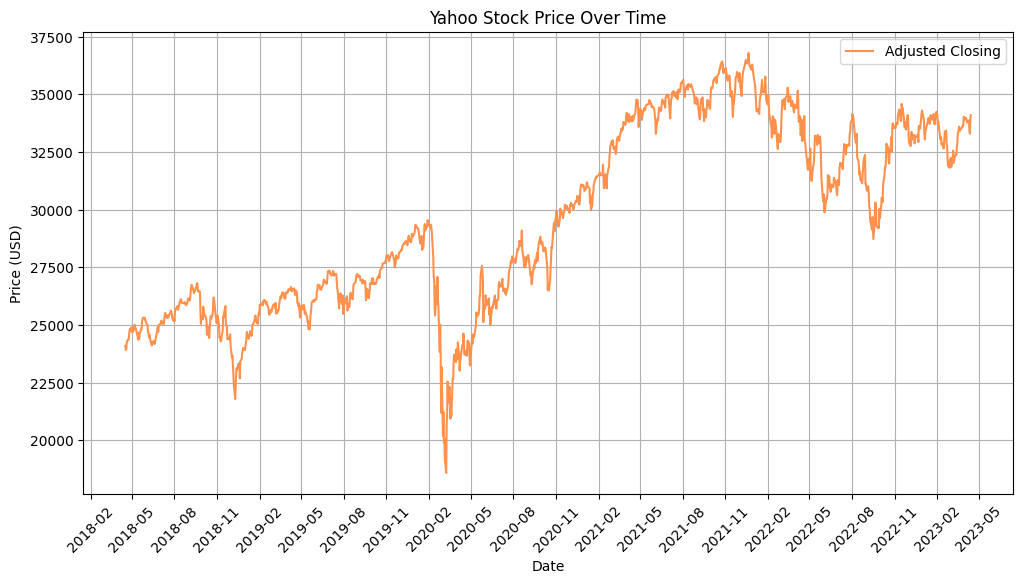

In [ ]:
# Plotting the closing prices over time
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['adjClose'], label='Adjusted Closing', color = '#FF914D')
plt.title('Yahoo Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)

# Format the x-axis to show the year and month ('2024-01')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Adjust the frequency of the x-ticks to show every 4 months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonthday=15, interval=3))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

Looking at the chart of the adjusted closing price, we notice a few key things:

*   Upward Trend: The stock price has generally been going up from 2018 to 2023, showing that the stock has been growing steadily over time.

*   Big Price Fluctuations: The stock price has some sharp ups and downs, especially between 2018 and 2020. This shows that the stock was quite volatile during this period.

*   Sharp Drop in Early 2020: There is a significant drop in the price in early 2020, followed by a quick recovery. This suggests that something unusual happened at that time, but the stock quickly bounced back.

*   More Stable After 2020: After the sharp drop, the price seems to rise more smoothly, indicating that the stock has become more stable in the later years.

Given these observations, the data looks like it may not be stationary, so we might need to adjust it before we can make reliable forecasts.

# **1.2 Identify missing values, outliers, trends, and assessing stationarity**

# **1.2.1 Identify Missing Values**

In [ ]:
# Calculate and display the number and percentage of missing values for each column in the dataset

print("Missing Values Frequency Distribution in the Dataset\n")
print(stock_data.isnull().sum(), '\n')  # Number of missing values per column
print(round(stock_data.isnull().mean() * 100, 2))  # Percentage of missing values per column

# Calculate the total number and percentage of rows with at least one missing value
rows_with_missing = stock_data.isnull().any(axis=1).sum()  # Count rows with missing values
rows_with_missing_percentage = round(stock_data.isnull().any(axis=1).mean() * 100, 2)  # Percentage of rows with missing values

print("\n")

# Check the percentage of rows with missing values and decide the action based on the threshold
if rows_with_missing_percentage == 0:
    print(f"There are no missing values, and the dataset is clean.")
elif rows_with_missing_percentage < 10:
    print(f"Total number of rows with at least one missing value: {rows_with_missing}, "
          f"representing {rows_with_missing_percentage}% of the dataset. Since this is less than 10%, "
          "we decided to drop rows with missing values.\n")
elif rows_with_missing_percentage > 10:
    print(f"Total number of rows with at least one missing value: {rows_with_missing}, "
          f"representing {rows_with_missing_percentage}% of the dataset. Since this is more than 10%, "
          "we decided to impute the missing values.\n")


Missing Values Frequency Distribution in the Dataset

open        0
high        0
low         0
close       0
adjClose    0
volume      0
dtype: int64 

open        0.0
high        0.0
low         0.0
close       0.0
adjClose    0.0
volume      0.0
dtype: float64


There are no missing values, and the dataset is clean.


#There are no missing values, and the dataset is clean.

# **1.2.2 Identify Outliers**

#The Interquartile Range (IQR) is the range between the first quartile (Q1) and third quartile (Q3), representing the middle 50% of the data. Outliers are values that lie more than 1.5 times the IQR above the third quartile or below the first quartile. Extreme values, on the other hand, are those that fall more than 3 times the IQR beyond the quartiles.

In [ ]:
# Q1, Q3
Q1 = stock_data['adjClose'].quantile(0.25)
Q3 = stock_data['adjClose'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1  # The range between the 75th and 25th percentiles

# Print the IQR, lower bound, and upper bound
print(f"Interquartile Range (IQR): {IQR}")
print(f"Lower Bound: {Q1 - 1.5 * IQR}")
print(f"Upper Bound: {Q3 + 1.5 * IQR}")

# Define outliers as values outside the range of 1.5 times the IQR from the first and third quartiles
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers based on the IQR method
outliers = stock_data[(stock_data['adjClose'] < lower_bound) | (stock_data['adjClose'] > upper_bound)]

# Print whether there are outliers or not
if outliers.empty:
    print("\n There are No outliers detected.")
else:
    print("\nOutliers detected:")
    print(outliers)


Interquartile Range (IQR): 7573.2225
Lower Bound: 14667.28625
Upper Bound: 44960.17625

 There are No outliers detected.


In [ ]:
import seaborn as sns
import os

# Set the file path for saving the plot
file_path = '/content/boxplot_adjusted_close.png'

# Create directory if it doesn't exist
os.makedirs(os.path.dirname(file_path), exist_ok=True)

# Q1, Q2 (median), and Q3
Q1 = stock_data['adjClose'].quantile(0.25)
Q2 = stock_data['adjClose'].quantile(0.50)
Q3 = stock_data['adjClose'].quantile(0.75)
IQR = Q3 - Q1

# Outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers (values outside of the bounds)
outliers = stock_data[(stock_data['adjClose'] < lower_bound) | (stock_data['adjClose'] > upper_bound)]

# Print Q1, Q2, Q3, and outliers
print(f"Q1: {Q1}, Q2 (Median): {Q2}, Q3: {Q3}")
if not outliers.empty:
    print("Outliers detected:")
    print(outliers)

# Plot boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=stock_data['adjClose'])
plt.title('Box Plot of Adjusted Closing Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Value')

# Annotate the values for Q1, Q2 (Median), Q3, and outlier bounds on the plot
plt.text(0.8, Q1, f'Q1: {Q1:.2f}', horizontalalignment='center', color='blue', fontsize=12)
plt.text(0.8, Q2, f'Q2 (Median): {Q2:.2f}', horizontalalignment='center', color='green', fontsize=12)
plt.text(0.8, Q3, f'Q3: {Q3:.2f}', horizontalalignment='center', color='blue', fontsize=12)
plt.text(0.8, lower_bound, f'Lower Bound: {lower_bound:.2f}', horizontalalignment='center', color='red', fontsize=12)
plt.text(0.8, upper_bound, f'Upper Bound: {upper_bound:.2f}', horizontalalignment='center', color='red', fontsize=12)

# If outliers exist, annotate them on the plot
if not outliers.empty:
    for i, value in outliers.iterrows():
        plt.text(0.8, value['adjClose'], f'Outlier: {value["adjClose"]:.2f}', horizontalalignment='center', color='purple', fontsize=12)

# Save the plot
plt.savefig(file_path)
plt.close()
print(f"Plot saved at: {file_path}")


Q1: 26027.12, Q2 (Median): 29199.46, Q3: 33600.3425
Plot saved at: /content/boxplot_adjusted_close.png


# There are no outliers or extreme values, and the dataset is clean.

# **1.2.3 Trend identification**

# Trends reflect the long-term direction of a time series, showing whether values are generally increasing or decreasing. These trends can be deterministic, following a consistent pattern, or stochastic, with random fluctuations.

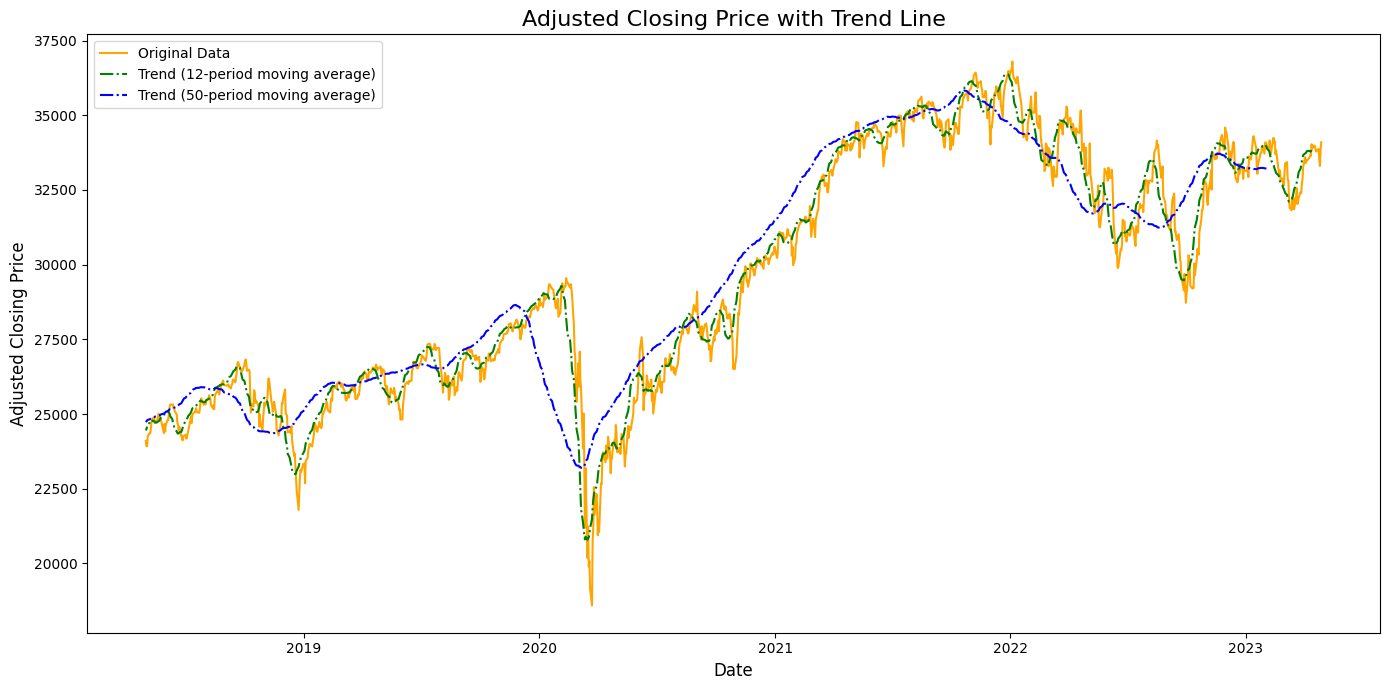

In [ ]:
# Increase the window size for smoother trend line
rolling_mean_12 = stock_data['adjClose'].rolling(window=12).mean()
rolling_mean_60 = stock_data['adjClose'].rolling(window=60).mean()

# Plot the adjusted trend line
plt.figure(figsize=(14, 7))
plt.plot(stock_data['adjClose'], label='Original Data', color='orange')
plt.plot(rolling_mean_12, label='Trend (12-period moving average)', color='green', linestyle='-.')
plt.plot(rolling_mean_60, label='Trend (50-period moving average)', color='blue', linestyle='-.')

# Title and labels
plt.title('Adjusted Closing Price with Trend Line', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Adjusted Closing Price', fontsize=12)
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


 The adjusted closing price shows a clear upward trend over time, as seen in both the 12-month and 50-month moving averages. The 12-month moving average reacts quickly to short-term changes, while the 50-month moving average provides a smoother, long-term trend. Both trend lines confirm that the overall direction of the stock price has been increasing, despite some short-term fluctuations, particularly around 2020. This analysis indicates that there is a strong long-term trend in the adjusted closing price of the stock.

# **1.2.4 Stationarity**

# We will perform the Augmented Dickey-Fuller (ADF) test to detect the presence of a unit root, which indicates non-stationarity, and the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test to evaluate the stationarity of the time series.

# **Augmented Dickey-Fuller (ADF) test:**

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller (ADF) test
adf_test = adfuller(stock_data['adjClose'])

# Display the results of the ADF test
print('ADF Test Results:')
print(f'ADF Statistic: {round(adf_test[0], 3)}')
print(f'p-value: {round(adf_test[1], 3)}')
print('Critical Values:')
for key, value in adf_test[4].items():
    print(f'   {key}: {round(value, 3)}')


ADF Test Results:
ADF Statistic: -1.42
p-value: 0.572
Critical Values:
   1%: -3.436
   5%: -2.864
   10%: -2.568


 Null Hypothesis (H0): The time series has a unit root (non-stationary).
 Alternative Hypothesis (H1): The time series is stationary.

 The ADF statistic is -1.42, which is negative and less than 0. This suggests that the time series is likely non-stationary.
 The p-value is 0.572, which is significantly higher than typical significance levels (0.1, 0.05 or 0.01). A high p-value indicates we do not have enough evidence to reject the null hypothesis.
 The ADF statistic is also greater than the critical values at all levels (1%, 5%, and 10%), indicating that the test statistic is not in the rejection region.
 Finally: Since the p-value is much higher than typical significance levels and the ADF statistic is greater than the critical values, we fail to reject the null hypothesis. This suggests that the time series has a unit root and is non-stationary.


# **Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test**

In [ ]:
from statsmodels.tsa.stattools import kpss

# Perform the KPSS test on the adjusted closing price data
kpss_test = kpss(stock_data['adjClose'], regression='ct')  # 'ct' for trend stationarity (constant + trend)

# Display the results of the KPSS test
print('KPSS Test Results:')
print(f'KPSS Statistic: {round(kpss_test[0], 2)}')  # KPSS statistic rounded to 2 decimal places
print(f'p-value: {kpss_test[1]}')  # p-value from the test
print('Critical Values:')
for key, value in kpss_test[3].items():
    print(f'   {key}: {value}')  # Print the critical values at different significance levels


KPSS Test Results:
KPSS Statistic: 0.46
p-value: 0.01
Critical Values:
   10%: 0.119
   5%: 0.146
   2.5%: 0.176
   1%: 0.216


<ipython-input-12-7e1645358c90>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(stock_data['adjClose'], regression='ct')  # 'ct' for trend stationarity (constant + trend)


 Null Hypothesis (H0): The time series is stationary.

 Alternative Hypothesis (H1): The time series is non-stationary.

 The KPSS statistic is 0.46, which is relatively low, suggesting that the time series may be stationary.

 The p-value is 0.01, which is smaller than the typical significance level (0.05), indicating that we can reject the null hypothesis.

 The KPSS statistic is also compared to the critical values at different significance levels. The statistic is higher than the critical values at 1%, 5%, and 10% levels, which suggests that the null hypothesis is rejected.

 Since the p-value is smaller than the significance level and the KPSS statistic is higher than the critical values, we reject the null hypothesis.
 This indicates that the time series is non-stationary, as evidenced by the result of the KPSS test.


# **Kolmogorov-Smirnov (K-S) test**

# **2. Time Series Decomposition**

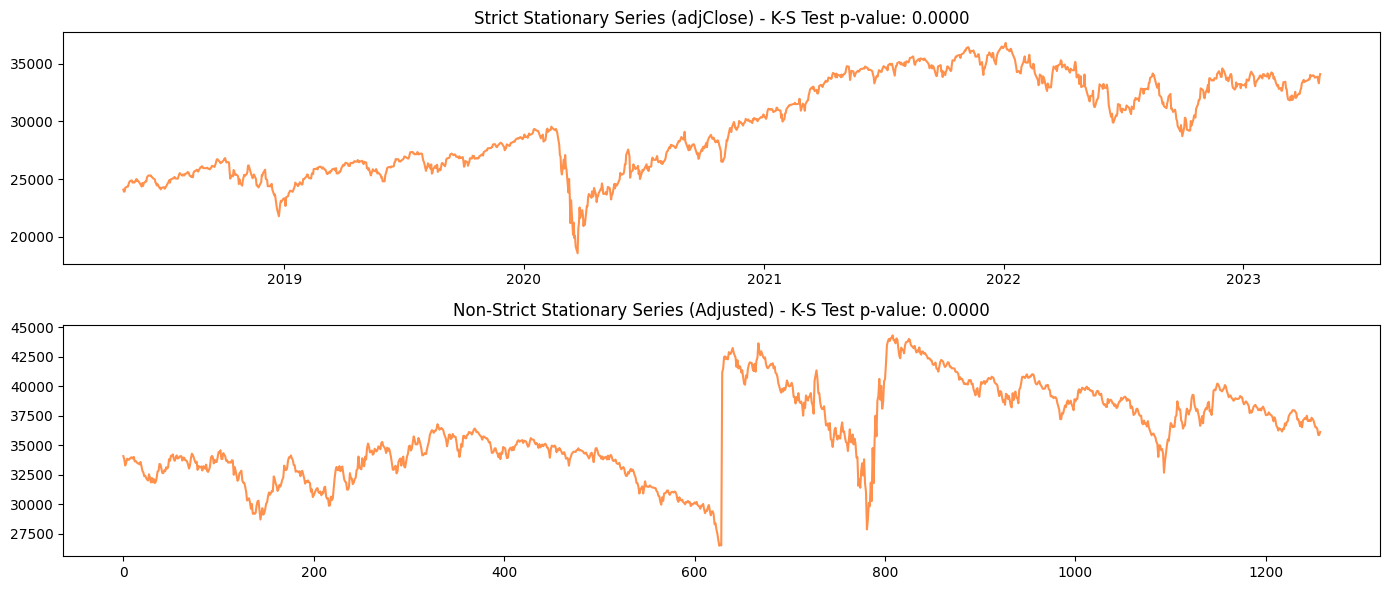

Strict Stationary Series - K-S Test Statistic: 0.9650238473767886, p-value: 0.0000
Non-Strict Stationary Series - K-S Test Statistic: 0.8744038155802861, p-value: 0.0000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest, ks_2samp

# Function to split the series into two halves and perform the K-S test
def ks_test_stationarity(series):
    split = len(series) // 2
    series_first_half = series[:split]
    series_second_half = series[split:]
    stat, p_value = ks_2samp(series_first_half, series_second_half)
    return stat, p_value

# Perform the K-S test on the strictly stationary series (adjusted close price)
ks_stat_strict, ks_pvalue_strict = ks_test_stationarity(stock_data['adjClose'])

# For demonstration, create a non-strictly stationary series (in this case, we simulate a change in variance)
# You can modify this according to your dataset and analysis
non_strict_stationary_series = np.concatenate([
    stock_data['adjClose'].iloc[:len(stock_data) // 2].values,
    stock_data['adjClose'].iloc[len(stock_data) // 2:].values * 1.5  # Simulate increased variance
])

# Perform the K-S test on the non-strictly stationary series
ks_stat_non_strict, ks_pvalue_non_strict = ks_test_stationarity(non_strict_stationary_series)

# Plotting the series
plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(stock_data['adjClose'], color = '#FF914D')
plt.title(f'Strict Stationary Series (adjClose) - K-S Test p-value: {ks_pvalue_strict:.4f}')

plt.subplot(2, 1, 2)
plt.plot(non_strict_stationary_series, color = '#FF914D')
plt.title(f'Non-Strict Stationary Series (Adjusted) - K-S Test p-value: {ks_pvalue_non_strict:.4f}')

plt.tight_layout()
plt.show()

print(f'Strict Stationary Series - K-S Test Statistic: {ks_stat_strict}, p-value: {ks_pvalue_strict:.4f}')
print(f'Non-Strict Stationary Series - K-S Test Statistic: {ks_stat_non_strict}, p-value: {ks_pvalue_non_strict:.4f}')


Null Hypothesis (H₀): The distribution of the series is stationary (follows the same theoretical distribution over time).

Alternative Hypothesis (H₁): The distribution of the series is not stationary (changes over time).

The results show extremely low p-values (0.0000) for both the strictly stationary series and the non-strictly stationary series. This means we reject the null hypothesis in both cases. The K-S test indicates that the empirical distributions of both series significantly differ from their expected theoretical distributions. Therefore, neither series is stationary in distribution, confirming that the data undergoes changes in its statistical properties over time. This reinforces the importance of applying transformation techniques or time series models that can handle non-stationary behavior.

# 2.1 Additive Classical Decomposition:


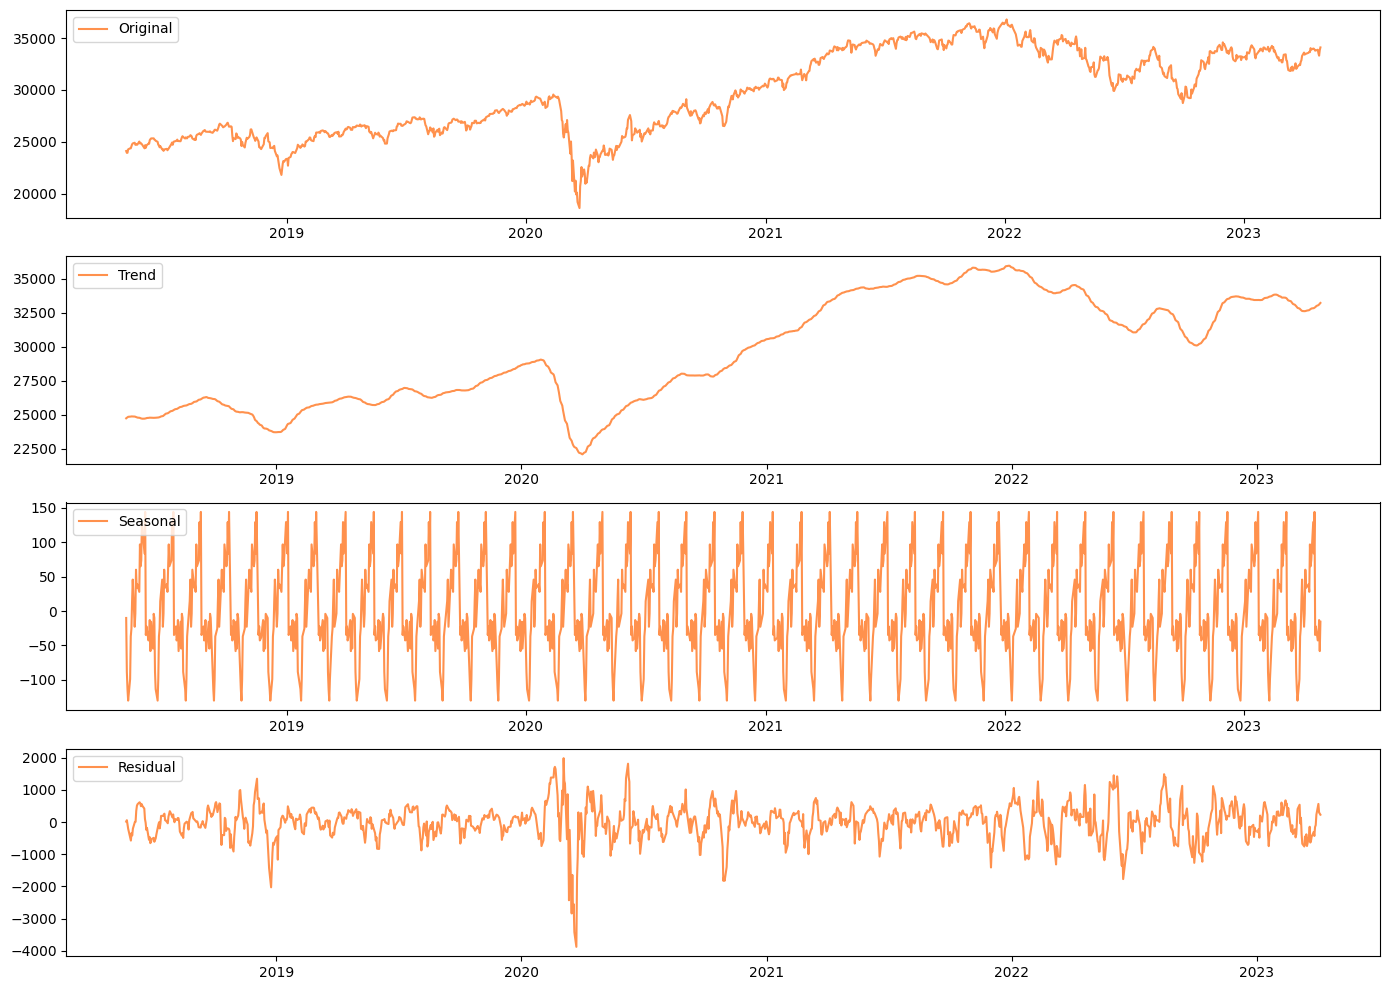

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
# The 'period' parameter depends on how often we expect the data to repeat (daily data, period=30)
decomposition_additive = seasonal_decompose(stock_data['adjClose'], model='additive', period=30)
# Extract the individual components from the decomposition: trend, seasonality, and residuals
trend_additive = decomposition_additive.trend
seasonal_additive = decomposition_additive.seasonal
residual_additive = decomposition_additive.resid
# Create a large figure to display the decomposition results
plt.figure(figsize=(14, 10))
# Plot the original time series data
plt.subplot(411)
plt.plot(stock_data['adjClose'], label='Original', color='#FF914D')
plt.legend(loc='upper left')
# Plot the trend component (long-term direction of the data)
plt.subplot(412)
plt.plot(trend_additive, label='Trend', color='#FF914D')
plt.legend(loc='upper left')
# Plot the seasonal component (repeated patterns over time)
plt.subplot(413)
plt.plot(seasonal_additive, label='Seasonal', color='#FF914D')
plt.legend(loc='upper left')
# Plot the residuals (the remaining noise after trend and seasonality have been removed)
plt.subplot(414)
plt.plot(residual_additive, label='Residual', color='#FF914D')
plt.legend(loc='upper left')
# Adjust the layout of the plots so they fit neatly together
plt.tight_layout()
plt.show()


# 2.2 Multiplicative Classical Decomposition:


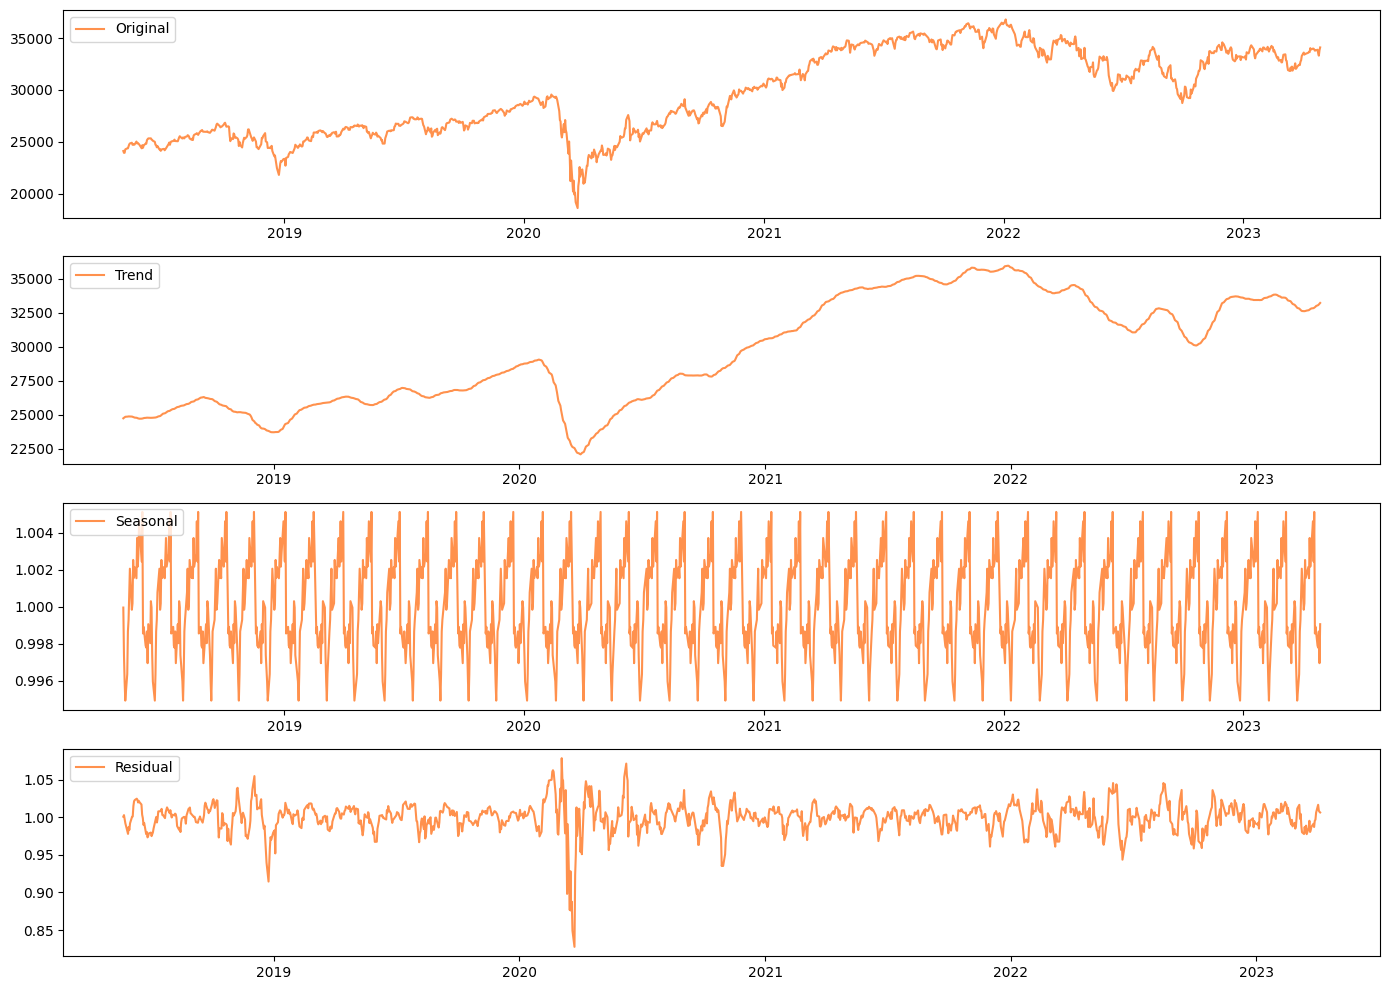

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
# The 'period' parameter depends on how often we expect the data to repeat (daily data, period=30)
decomposition_multiplicative = seasonal_decompose(stock_data['adjClose'], model='multiplicative', period=30)
# Extract the individual components from the decomposition: trend, seasonality, and residuals
trend_multiplicative = decomposition_multiplicative.trend
seasonal_multiplicative = decomposition_multiplicative.seasonal
residual_multiplicative = decomposition_multiplicative.resid
# Create a large figure to display the decomposition results
plt.figure(figsize=(14, 10))
# Plot the original time series data
plt.subplot(411)
plt.plot(stock_data['adjClose'], label='Original', color='#FF914D')
plt.legend(loc='upper left')
# Plot the trend component (long-term direction of the data)
plt.subplot(412)
plt.plot(trend_multiplicative, label='Trend', color='#FF914D')
plt.legend(loc='upper left')
# Plot the seasonal component (repeated patterns over time)
plt.subplot(413)
plt.plot(seasonal_multiplicative, label='Seasonal', color='#FF914D')
plt.legend(loc='upper left')
# Plot the residuals (the remaining noise after trend and seasonality have been removed)
plt.subplot(414)
plt.plot(residual_multiplicative, label='Residual', color='#FF914D')
plt.legend(loc='upper left')
# Adjust the layout of the plots so they fit neatly together
plt.tight_layout()
plt.show()


# **Comparison Between Additive and Multiplicative Decomposition**

 **Trend Comparison:**
 The trend components in both the additive and multiplicative models follow the same general shape: a steady upward movement in stock prices from 2018 to early 2022, followed by a modest dip, and then a continued rise into 2023. The additive trend appears slightly smoother, while the multiplicative trend includes a bit more local fluctuation, especially in high-price regions. Still, both models effectively capture the major structural changes in the data, including the sharp drop and recovery around 2020. Overall, there is no significant difference in how the trend is estimated between the two models, which reflects the nature of our dataset—where the long-term behavior of stock prices is mostly linear with some gradual shifts.

 **Seasonal Comparison:**
 The seasonal component is where the models show a slight difference in how they represent variation. In the additive model, the seasonal effect fluctuates with a constant amplitude, ranging from about -60 to +30, regardless of whether the stock price is at $20,000  or  $35,000. In contrast, the multiplicative model expresses seasonality as a ratio, and the values remain very close to 1- between 0.998 and 1.001- indicating only slight relative variation. While both models identify a recurring weekly pattern, the seasonal effect is small in both absolute and proportional terms. This suggests that seasonality is present but not a significant factor in driving the overall stock price movements in our dataset.

 **Residual Comparison:**
The residuals in both the additive and multiplicative models appear largely random, with no visible repeating patterns or trends. This suggests that each model has successfully separated out the main structure of the data- namely the trend and minimal seasonality- leaving behind noise. In the additive model, the residuals fluctuate in a wider range, from approximately -1500 to +1000, since they are expressed in absolute price units. The multiplicative residuals, on the other hand, range between 0.925 and 1.05, as they are defined relative to the fitted values. While the multiplicative residuals appear more compressed and stable, this is a result of the model's scaling rather than a difference in model accuracy. Since both sets of residuals show randomness and lack of visible structure, we can conclude that both models have captured the main components of the data with similar effectiveness.

 Both the additive and multiplicative classical decomposition models perform similarly in analyzing our stock adjusted closing price data. They capture the same overall trend and detect a recurring but minimal seasonal pattern. The residuals from both models appear random and show no remaining structure, indicating that the primary components—trend and seasonality—have been effectively extracted. While the residuals differ in scale due to the nature of each model, this does not reflect a meaningful difference in accuracy. Overall, either model could be used for this dataset, as both provide a consistent and reliable breakdown of the time series.


# 2.3 Seasonal and Trend decomposition using Loess (STL) Time Series Decomposition

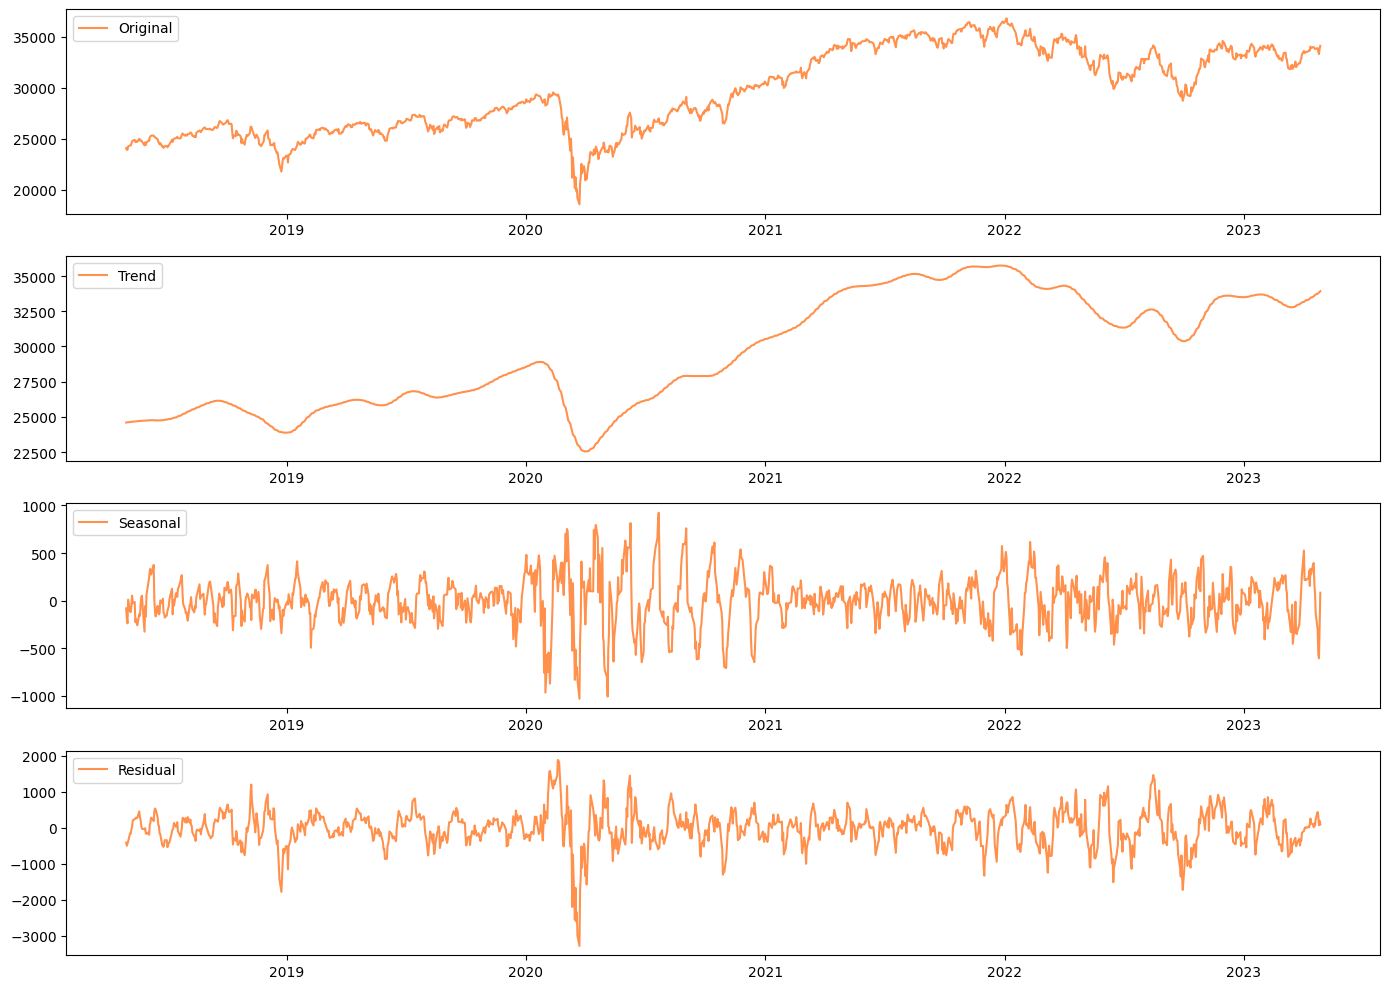

In [ ]:
from statsmodels.tsa.seasonal import STL

# Perform STL decomposition on the adjusted closing price data
stl = STL(stock_data['adjClose'], period=30)
result = stl.fit()
# Create a plot to visualize the decomposition components
plt.figure(figsize=(14, 10))
# Plot the original data (adjusted closing price)
plt.subplot(411)
plt.plot(result.observed, label='Original', color='#FF914D')
plt.legend(loc='upper left')
# Plot the trend component (long-term pattern in the data)
plt.subplot(412)
plt.plot(result.trend, label='Trend', color='#FF914D')
plt.legend(loc='upper left')
# Plot the seasonal component (repeating patterns over time)
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal', color='#FF914D')
plt.legend(loc='upper left')
# Plot the residual component (the unexplained variation in the data)
plt.subplot(414)
plt.plot(result.resid, label='Residual', color='#FF914D')
plt.legend(loc='upper left')
# Adjust layout to make sure all subplots fit neatly
plt.tight_layout()
# Show the plot
plt.show()


# **Comparison Between STL, Additive and Multiplicative Decomposition**

 Trend Comparison:
 The STL model shows the same general upward movement in stock prices from 2018 to 2023, similar to both the additive and multiplicative models. However, the STL trend appears visually smoother, especially during volatile periods like the 2020 dip and recovery. This is because STL uses a more flexible approach to trend extraction, adapting to changes in the data, while the other two models show less flexibility in their trend estimation. Despite these differences, all three models successfully capture the major structural changes in the data, including the sharp drop and recovery around 2020. Therefore, while the STL trend is slightly more refined, there is no significant difference in the overall trend pattern across the models.

 Seasonal Comparison:
 The key difference in seasonality comes with the STL model's ability to capture time-varying seasonality, which is not present in the additive or multiplicative models. While both classical models represent seasonality with a fixed amplitude (additive with constant fluctuations and multiplicative with relative proportional changes), the STL model allows the amplitude to vary over time. This is evident in the increased seasonal fluctuations around 2020 and 2022, making STL more adaptable in capturing changing seasonal patterns. However, despite this dynamic approach, the seasonal effect remains small in all models, indicating that seasonality does not play a major role in driving stock price movements.

 Residual Comparison:
 In terms of residuals, both the additive and multiplicative models show random fluctuations, indicating that the trend and seasonality have been largely separated from the data. The STL model, similarly, shows residuals that appear closer to random noise and have less variance than the additive residuals. This suggests that STL is particularly effective at isolating the primary components of the data, leaving behind fewer unexplained variations. While the multiplicative residuals are more stable and compressed due to the model’s scaling, the STL model provides the cleanest residual signal overall, as it adapts to time-varying patterns and removes more of the underlying noise.

 While the additive and multiplicative decomposition models perform similarly in analyzing the stock adjusted closing price data, the STL decomposition offers a distinct advantage due to its ability to adapt to time-varying seasonality, which is not captured by the classical models. Additionally, the STL model provides a cleaner residual signal, with less unexplained noise compared to the additive model. Overall, the STL decomposition is more flexible and may be better suited for datasets where seasonal effects evolve over time. In terms of trend estimation, however, all three models are effective, with only slight differences in smoothness. Therefore, while both the additive and multiplicative decomposition models are valid for this dataset, the STL decomposition stands out for its ability to handle evolving seasonal patterns, offering a more dynamic and refined breakdown of the data. This adaptability makes STL especially valuable when the strength of seasonality changes over time, as observed in the fluctuations around 2020 and 2022.

# **Business Insights**

 Business Insights from Stock Adjusted Close Price Analysis:

**1. Promising Market Growth:**
The consistent upward trend observed from 2018 to 2023 indicates a strong and resilient market recovery, especially after the 2020 Covid-19 shock. This signals a favorable environment for long-term investments and strategic expansion. Businesses can confidently plan for growth, as the market shows clear signs of momentum and stability.

**2. Limited Seasonal Influence:**
Seasonality plays a minor role in the movement of stock prices. This suggests that businesses should not heavily rely on short-term seasonal cycles for forecasting or decision-making. Instead, focus should remain on long-term trends and economic fundamentals when planning production, inventory, or market entry strategies.

**3. High Volatility Requires Agility:**
Short-term fluctuations in stock prices—especially during major events like the Covid-19 crisis—highlight the impact of external, unpredictable factors. Businesses should build flexibility into their operations and financial planning to remain resilient in the face of sudden market shifts.

**4. Strategic Planning Based on Reliable Trends:**
The trend extracted from the STL model shows a smooth, well-defined pattern even during volatile periods, confirming the reliability of the underlying market trajectory. This allows businesses to make forward-looking decisions with greater confidence, supported by stable long-term signals.

# 3 Modeling

# 3.1 Making data stationary

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss

# Performing ADF and KPSS tests
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print('Critical Value (%s): %.3f' % (key, value))

# Corrected KPSS test function
def kpss_test(series):
    result = kpss(series, regression='c')
    print('KPSS Statistic:', result[0])
    print('p-value:', result[1])

    # Now we directly access result[2] which contains the critical values (dictionary)
    for key, value in result[2].items():
        print('Critical Value (%s): %.3f' % (key, value))




# **3.1.1 Differencing**

In [ ]:
# Perform differencing with the previous series
stock_data['adjClose_diff'] = stock_data['adjClose'].diff()

# Display the first few rows of the differenced series to inspect the result
print(stock_data[['adjClose', 'adjClose_diff']].head(10))


            adjClose  adjClose_diff
date                               
2023-04-28  34098.16            NaN
2023-04-27  33826.16        -272.00
2023-04-26  33301.87        -524.29
2023-04-25  33530.83         228.96
2023-04-24  33875.40         344.57
2023-04-21  33808.96         -66.44
2023-04-20  33786.62         -22.34
2023-04-19  33897.01         110.39
2023-04-18  33976.63          79.62
2023-04-17  33987.18          10.55


# **3.1.2 Transformation**

In [ ]:
import numpy as np
from scipy import stats

prices = stock_data['adjClose']

# Log transformation - Save into a new column 'adjClose_log'
stock_data['adjClose_log'] = np.log(prices)

# Square root transformation - Save into a new column 'adjClose_sqrt'
stock_data['adjClose_sqrt'] = np.sqrt(prices)

# Box-Cox transformation - Save into a new column 'adjClose_boxcox'
# Note: Box-Cox requires all positive values, so ensure prices are greater than 0
stock_data['adjClose_boxcox'], lam = stats.boxcox(prices[prices > 0])
stock_data['boxcox_lambda'] = lam

# Display the first few rows of the transformed series
print("Log Transformation:", stock_data['adjClose_log'].head())
print("Square Root Transformation:", stock_data['adjClose_sqrt'].head())
print("Box-Cox Transformation:", stock_data['adjClose_boxcox'][:5], "Lambda:", lam)


Log Transformation: date
2023-04-28    10.436999
2023-04-27    10.428990
2023-04-26    10.413369
2023-04-25    10.420221
2023-04-24    10.430444
Name: adjClose_log, dtype: float64
Square Root Transformation: date
2023-04-28    184.656871
2023-04-27    183.918895
2023-04-26    182.488000
2023-04-25    183.114254
2023-04-24    184.052710
Name: adjClose_sqrt, dtype: float64
Box-Cox Transformation: date
2023-04-28    1592.160463
2023-04-27    1583.659453
2023-04-26    1567.209074
2023-04-25    1574.403538
2023-04-24    1585.200064
Name: adjClose_boxcox, dtype: float64 Lambda: 0.6678215798232667


# **3.1.3 De-trending**

In [ ]:
import numpy as np
import pandas as pd

prices = stock_data['adjClose']

# Using a linear trend to detrend the series
trend = np.polyfit(np.arange(len(prices)), prices, 1)
trendline = np.polyval(trend, np.arange(len(prices)))
stock_data['adjClose_detrended_linear'] = prices - trendline

# Using moving averages to remove trend for different window sizes
windows = [30]

# Detrending using moving averages with different windows
for window in windows:
    moving_average = prices.rolling(window=window).mean()
    detrended_column_name = f'adjClose_detrended_MA{window}'
    stock_data[detrended_column_name] = prices - moving_average
    stock_data[detrended_column_name] = stock_data[detrended_column_name].dropna()

# Display the first few rows of the detrended data
print("Linear Detrended Series:", stock_data['adjClose_detrended_linear'].head())
for window in windows:
    detrended_column_name = f'adjClose_detrended_MA{window}'
    print(f"{window}-Day Moving Average Detrended Series:", stock_data[detrended_column_name].iloc[window-2:].head())


Linear Detrended Series: date
2023-04-28   -1209.220060
2023-04-27   -1472.138089
2023-04-26   -1987.346119
2023-04-25   -1749.304148
2023-04-24   -1395.652178
Name: adjClose_detrended_linear, dtype: float64
30-Day Moving Average Detrended Series: date
2023-03-20            NaN
2023-03-17   -1391.736333
2023-03-16    -945.446000
2023-03-15   -1252.373000
2023-03-14    -933.327333
Name: adjClose_detrended_MA30, dtype: float64


# **3.1.4 Seasonal adjustment**

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

prices = stock_data['adjClose']

# using different windows
windows = [30]

# Perform seasonal decomposition for each period and save the adjusted data
for window in windows:
    decomposition = seasonal_decompose(prices, model='additive', period=window)
    detrended_column_name = f'adjClose_seas_adjusted{window}'
    stock_data[detrended_column_name] = prices / decomposition.seasonal
    stock_data[detrended_column_name] = stock_data[detrended_column_name].dropna()

    print(f"Seasonally Adjusted Series for period {window} days ({detrended_column_name}):")
    print(stock_data[detrended_column_name].iloc[window-2:].head())

#print("Data with seasonally adjusted columns:", stock_data.iloc[window-2:].head())


Seasonally Adjusted Series for period 30 days (adjClose_seas_adjusted30):
date
2023-03-20   -8020.350690
2023-03-17    -584.481716
2023-03-16   -2075.959258
2023-03-15    -547.742348
2023-03-14   -2460.220374
Name: adjClose_seas_adjusted30, dtype: float64


# **3.2 Random Walk and White Noise**

In [ ]:
stock_data.head()

,open,high,low,close,adjClose,volume,adjClose_diff,adjClose_log,adjClose_sqrt,adjClose_boxcox,boxcox_lambda,adjClose_detrended_linear,adjClose_detrended_MA30,adjClose_seas_adjusted30
date,,,,,,,,,,,,,,
2023-04-28,33797.43,34104.56,33728.40,34098.16,34098.16,354310000,NaN,10.436999,184.656871,1592.160463,0.667822,-1209.220060,NaN,-2195.161682
2023-04-27,33381.66,33859.75,33374.65,33826.16,33826.16,343240000,-272.00,10.428990,183.918895,1583.659453,0.667822,-1472.138089,NaN,-581.279067
2023-04-26,33596.34,33645.83,33235.85,33301.87,33301.87,321170000,-524.29,10.413369,182.488000,1567.209074,0.667822,-1987.346119,NaN,-2547.937176
2023-04-25,33828.34,33875.49,33525.39,33530.83,33530.83,297880000,228.96,10.420221,183.114254,1574.403538,0.667822,-1749.304148,NaN,-869.282128
2023-04-24,33805.04,33891.15,33726.09,33875.40,33875.40,252020000,344.57,10.430444,184.052710,1585.200064,0.667822,-1395.652178,NaN,-793.072986


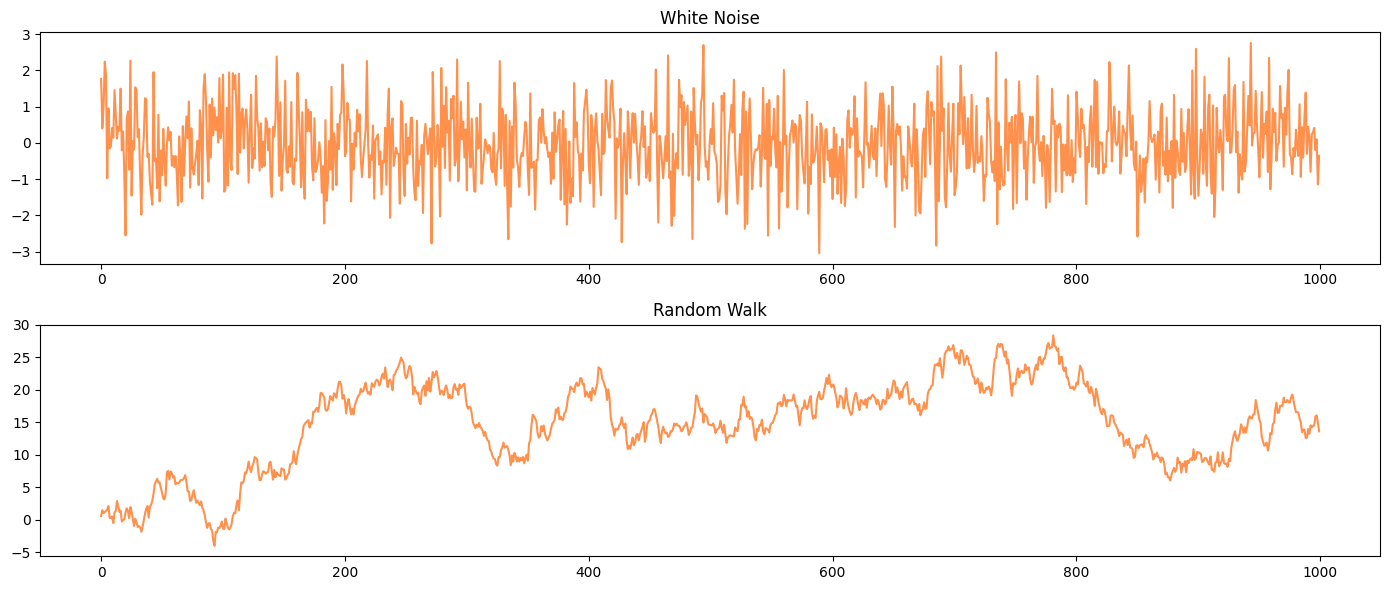


ADF Test for adjClose:
ADF Statistic: -1.420441252350837
p-value: 0.5724380460701348
Critical Value (1%): -3.436
Critical Value (5%): -2.864
Critical Value (10%): -2.568

KPSS Test for adjClose:
KPSS Statistic: 4.6740456672425355
p-value: 0.01
Critical Value (10%): 0.347
Critical Value (5%): 0.463
Critical Value (2.5%): 0.574
Critical Value (1%): 0.739

ADF Test for adjClose_detrended_linear:
ADF Statistic: -2.892016327531922
p-value: 0.04628429783678464
Critical Value (1%): -3.436
Critical Value (5%): -2.864
Critical Value (10%): -2.568

KPSS Test for adjClose_detrended_linear:
KPSS Statistic: 0.46001628142293427
p-value: 0.051286085593562826
Critical Value (10%): 0.347
Critical Value (5%): 0.463
Critical Value (2.5%): 0.574
Critical Value (1%): 0.739

ADF Test for adjClose_detrended_MA30:


<ipython-input-23-af5c1e9dc67b>:17: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c')
<ipython-input-23-af5c1e9dc67b>:17: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression='c')
<ipython-input-23-af5c1e9dc67b>:17: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression='c')


ADF Statistic: -7.132609914853907
p-value: 3.486150798139441e-10
Critical Value (1%): -3.436
Critical Value (5%): -2.864
Critical Value (10%): -2.568

KPSS Test for adjClose_detrended_MA30:
KPSS Statistic: 0.07504504299982546
p-value: 0.1
Critical Value (10%): 0.347
Critical Value (5%): 0.463
Critical Value (2.5%): 0.574
Critical Value (1%): 0.739

ADF Test for adjClose_seas_adjusted30:
ADF Statistic: -28.311796841050246
p-value: 0.0
Critical Value (1%): -3.436
Critical Value (5%): -2.864
Critical Value (10%): -2.568

KPSS Test for adjClose_seas_adjusted30:
KPSS Statistic: 0.21220465080769418
p-value: 0.1
Critical Value (10%): 0.347
Critical Value (5%): 0.463
Critical Value (2.5%): 0.574
Critical Value (1%): 0.739

Ljung-Box Test for adjClose:
         lb_stat  lb_pvalue
10  12008.886443        0.0

Ljung-Box Test for adjClose_detrended_linear:
         lb_stat  lb_pvalue
10  11152.168825        0.0

Ljung-Box Test for adjClose_detrended_MA30:
       lb_stat  lb_pvalue
10  6329.08969  

<ipython-input-23-af5c1e9dc67b>:17: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression='c')
<ipython-input-23-af5c1e9dc67b>:17: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.diagnostic import acorr_ljungbox

from statsmodels.tsa.stattools import adfuller, kpss

# Performing ADF and KPSS tests
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print('Critical Value (%s): %.3f' % (key, value))

def kpss_test(series):
    result = kpss(series, regression='c')
    print('KPSS Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[3].items():
        print('Critical Value (%s): %.3f' % (key, value))

# List of columns to check for stationarity in our data
columns_to_test = [
    'adjClose',
    'adjClose_detrended_linear',
    'adjClose_detrended_MA30',
    'adjClose_seas_adjusted30'
]

# Generating White Noise and Random Walk for comparison
np.random.seed(0)
n = 1000

# White Noise
white_noise = np.random.normal(0, 1, n)

# Random Walk
random_shocks = np.random.normal(0, 1, n)
random_walk = np.cumsum(random_shocks)

# Plotting the series
plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(white_noise, color='#FF914D')
plt.title(f'White Noise')

plt.subplot(2, 1, 2)
plt.plot(random_walk, color='#FF914D')
plt.title(f'Random Walk')

plt.tight_layout()
plt.show()

# Run ADF and KPSS tests for each of the columns
for column in columns_to_test:
    print(f"\nADF Test for {column}:")
    adf_test(stock_data[column].dropna())
    print(f"\nKPSS Test for {column}:")
    kpss_test(stock_data[column].dropna())

# Ljung-Box Test: Checking for autocorrelation for each column
for column in columns_to_test:
    print(f"\nLjung-Box Test for {column}:")
    lb_test = acorr_ljungbox(stock_data[column].dropna(), lags=[10], return_df=True)
    print(lb_test)

# Running tests on white noise and random walk as examples
print("\nADF Test for White Noise:")
adf_test(white_noise)
print("\nKPSS Test for White Noise:")
kpss_test(white_noise)

print("\nADF Test for Random Walk:")
adf_test(random_walk)
print("\nKPSS Test for Random Walk:")
kpss_test(random_walk)

# Ljung-Box test for white noise and random walk
print("\nLjung-Box Test for White Noise:")
lb_test_white_noise = acorr_ljungbox(white_noise, lags=[10], return_df=True)
print(lb_test_white_noise)

print("\nLjung-Box Test for Random Walk:")
lb_test_random_walk = acorr_ljungbox(random_walk, lags=[10], return_df=True)
print(lb_test_random_walk)


Based on the results from the Augmented Dickey-Fuller (ADF) and Kwiatkowski-Phillips-Schmidt-Shin (KPSS) tests, the seasonal adjustment method emerged as the most effective for making the stock adjusted close price series stationary. After applying seasonal adjustment, the ADF test showed significant improvements in stationarity with a p-value below the critical threshold of 0.05, and the KPSS test indicated reduced trend-based components. In contrast, the linear detrending method also improved stationarity but was less comprehensive than the seasonal adjustment in handling both trends and seasonal fluctuations.

Differencing, while commonly used to remove trends, did not fully address the seasonality in the data, as evidenced by higher p-values in the ADF test. Therefore, the seasonal adjustment method was found to be the most suitable approach for our dataset, effectively addressing both trend and seasonality, making it the preferred method for preparing the data for further analysis and forecasting.

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform Ljung-Box test for autocorrelation with lags=[10]
acorr_ljungbox(stock_data['adjClose'].dropna(), lags=[10], return_df=True)


,lb_stat,lb_pvalue
10,12008.886443,0.0


Null Hypothesis (H₀): The time series has no autocorrelation (purely random).

Alternative Hypothesis (H₁): The time series has significant autocorrelation.

Based on the Ljung-Box test result, the p-value is 0.0, which is well below the standard significance level of 0.05. This leads us to reject the null hypothesis and conclude that there is significant autocorrelation in the adjClose stock price data. In other words, the data is not purely random and does not follow a random walk. Instead, it shows evidence of predictable patterns, suggesting that past values influence future values. This makes the dataset appropriate for time series forecasting models such as ARIMA, SARIMA, and LSTM, which rely on such dependencies for accurate predictions.

# **3.3 Time Series Forecasting Models**


In [ ]:
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

# Data File Path
file_path = '/content/ML2_Final_Project.xlsx'

# Load historical stock price data
stock_data_M = pd.read_excel(file_path)

stock_data_M.columns = [
    ''.join(word.capitalize() if i != 0 else word.lower() for i, word in enumerate(col.replace('-', ' ').replace('_', ' ').replace('*', ' ').split()))
    for col in stock_data_M.columns]

# Convert the 'date' column to datetime format
stock_data_M['date'] = pd.to_datetime(stock_data_M['date'])

# Set the 'date' column as the index
stock_data_M.set_index('date', inplace=True)


# Split the data into training and testing datasets
train_data, test_data = stock_data_M[:-30], stock_data_M[-30:]
#train_data, test_data


In [ ]:
stock_data_Modeling = stock_data['adjClose_seas_adjusted30']

# Split the data into training and testing datasets
train_data_M, test_data_M = stock_data_Modeling[:-30], stock_data_Modeling[-30:]
#train_data, test_data

In [ ]:
len(train_data)

1228

In [ ]:
len(train_data) + len(test_data)-1

1257

# **3.3.1 ARMA Model**

# **3.3 ACF and PACF Plot**

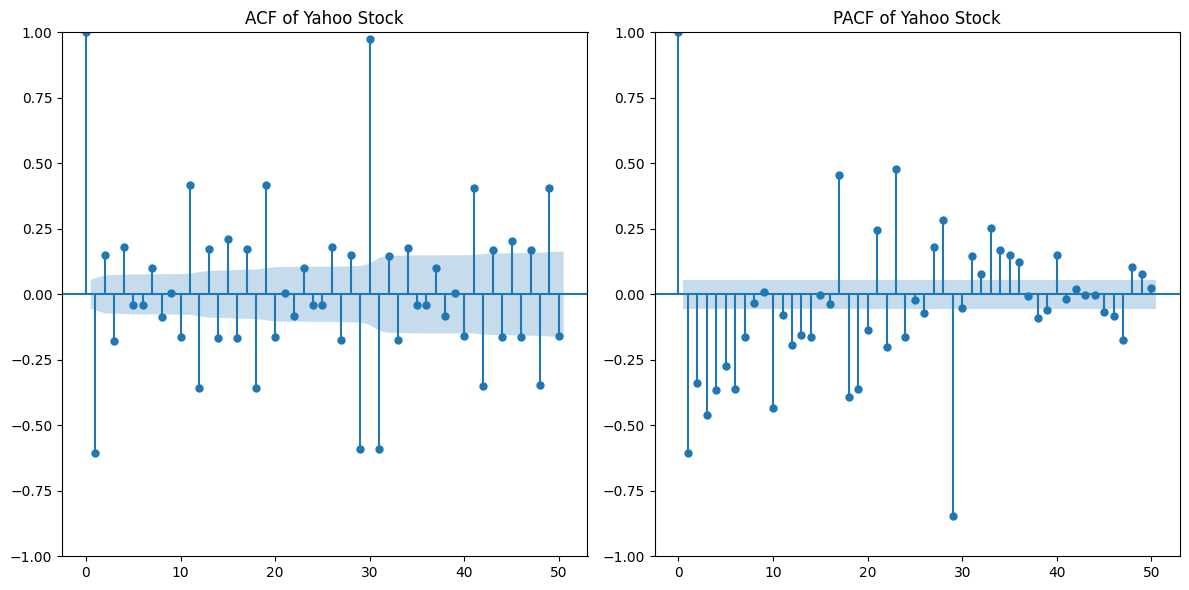

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12, 6))


# ACF Plot
plt.subplot(1, 2, 1)
plot_acf(stock_data['adjClose_seas_adjusted30'].diff().diff().dropna(), ax=plt.gca(), lags=50)
plt.title('ACF of Yahoo Stock')

# PACF Plot
plt.subplot(1, 2, 2)
plot_pacf(stock_data['adjClose_seas_adjusted30'].diff().diff().dropna(), ax=plt.gca(), lags=50, method='ywm')
plt.title('PACF of Yahoo Stock')

plt.tight_layout()
plt.show()

Based on the analysis of the ACF and PACF plots, suitable values for the ARIMA model parameters are determined to be p = 2 and q = 7. The PACF plot shows a significant drop after lag 2, indicating that the autoregressive (AR) component should be set to 2, as the correlations beyond this point are negligible. The ACF plot, however, displays a gradual decay with significant autocorrelations up to around lag 7, suggesting that the moving average (MA) component should be set to 7. This implies that the stock data exhibits short-term dependencies, where a lower order for the AR term and a higher order for the MA term effectively capture the behavior of the financial time series, as observed in this analysis.

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Define the modeling column
stock_data_Modeling = stock_data['adjClose']

# Split the data into training and testing datasets
train_data_M, test_data_M = stock_data_Modeling[:-30], stock_data_Modeling[-30:]

# Build the ARIMA(2, 0, 7) model
model = ARIMA(train_data_M, order=(2, 0, 7))
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(
    start=len(train_data_M),
    end=len(train_data_M) + len(test_data_M) - 1,
    dynamic=False
)

# Align index of predictions with test data for correct MAPE calculation
predictions.index = test_data_M.index

# Plot the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(test_data_M.index, test_data_M, label='Test data')
plt.plot(test_data_M.index, predictions, color='red', linestyle='--', label='Predicted Prices')
plt.title('Stock Adjusted Close Prices: Actual vs Predicted (ARMA)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Evaluate model performance
rmse = round(np.sqrt(mean_squared_error(test_data_M, predictions)), 2)
mae = round(mean_absolute_error(test_data_M, predictions), 2)
mse = round(mean_squared_error(test_data_M, predictions), 2)

# Handle division by zero for MAPE
mask = test_data_M != 0
if mask.sum() > 0:
    mape = round(np.mean(np.abs((test_data_M[mask] - predictions[mask]) / test_data_M[mask])) * 100, 2)
else:
    mape = np.nan

# Print the evaluation metrics
print('RMSE:', rmse)
print('MAE: ', mae)
print('MSE: ', mse)
print('MAPE:', mape)

NameError: name 'ARIMA' is not defined

Based on the ARIMA(2,0,7) model predictions for the adjusted stock prices, the actual data (shown in blue) and the predicted values (red dashed line) reveal that the model struggles to adapt to recent market fluctuations. While it follows the overall direction at the start, it fails to capture the declining trend and variability in the latter half. The evaluation metrics support this: the RMSE is 853.27 and the MAE is 731.21, indicating noticeable gaps between actual and predicted values. The MSE stands at 728875.51, reflecting the magnitude of these errors. Although the MAPE is a more promising 2.89%, this relatively low value may be misleading due to the model’s consistent overestimation. Overall, while the ARIMA model captures some long-term structure, it lacks the responsiveness needed to track short-term shifts in a volatile stock market.

# **3.3.2 ARIMA Model**

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Define the modeling column
stock_data_Modeling = stock_data['adjClose']

# Split the data into training and testing datasets
train_data_M, test_data_M = stock_data_Modeling[:-30], stock_data_Modeling[-30:]

# Build the ARIMA(2, 1, 7) model
model = ARIMA(train_data_M, order=(2, 1, 7))
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(
    start=len(train_data_M),
    end=len(train_data_M) + len(test_data_M) - 1,
    dynamic=False
)

# Align index of predictions with test data for correct MAPE calculation
predictions.index = test_data_M.index

# Plot the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(test_data_M.index, test_data_M, label='Test data')
plt.plot(test_data_M.index, predictions, color='red', linestyle='--', label='Predicted Prices')
plt.title('Stock Adjusted Close Prices: Actual vs Predicted (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Evaluate model performance
rmse = round(np.sqrt(mean_squared_error(test_data_M, predictions)), 2)
mae = round(mean_absolute_error(test_data_M, predictions), 2)
mse = round(mean_squared_error(test_data_M, predictions), 2)

# Handle division by zero for MAPE
mask = test_data_M != 0
if mask.sum() > 0:
    mape = round(np.mean(np.abs((test_data_M[mask] - predictions[mask]) / test_data_M[mask])) * 100, 2)
else:
    mape = np.nan

# Print the evaluation metrics
print('RMSE:', rmse)
print('MAE: ', mae)
print('MSE: ', mse)
print('MAPE:', mape)

NameError: name 'ARIMA' is not defined

Based on the ARIMA(2,1,7) model applied to predict the adjusted stock prices, the forecast (red dashed line) captures the general direction of the data but fails to respond to the more volatile movements present in the actual test data (blue line). The model produces relatively flat predictions, missing the sharper declines and rebounds observed in the actual price series. This limitation is reflected in the performance metrics: RMSE is 582.83, MAE is 488.1, and MSE is 339868.76, indicating moderate errors in prediction. However, the MAPE value of 1.99% suggests that, in percentage terms, the model performs reasonably well. In summary, while ARIMA(2,1,7) provides decent overall accuracy, it underperforms in capturing short-term volatility, making it less suitable for markets with sudden price shifts.

# **3.3.2 SARIMA Model**



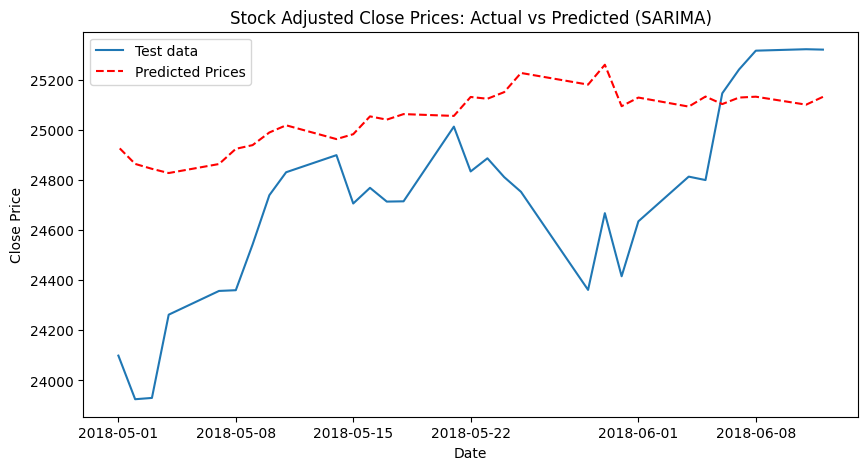

RMSE: 465.13
MAE:  393.27
MSE:  216350.22
MAPE: 1.61


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Define the modeling column
stock_data_Modeling = stock_data['adjClose']

# Split the data into training and testing datasets
train_data_M, test_data_M = stock_data_Modeling[:-30], stock_data_Modeling[-30:]

# Define SARIMA parameters
p, d, q = 2, 1, 7
P, D, Q, s = 1, 1, 1, 30

# Fit SARIMA model on training data
model = SARIMAX(train_data_M, order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(
    start=len(train_data_M),
    end=len(train_data_M) + len(test_data_M) - 1,
    dynamic=False
)

# Align index of predictions with test data for correct MAPE calculation
predictions.index = test_data_M.index

# Plot the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(test_data_M.index, test_data_M, label='Test data')
plt.plot(test_data_M.index, predictions, color='red', linestyle='--', label='Predicted Prices')
plt.title('Stock Adjusted Close Prices: Actual vs Predicted (SARIMA)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Evaluate model performance
rmse = round(np.sqrt(mean_squared_error(test_data_M, predictions)), 2)
mae = round(mean_absolute_error(test_data_M, predictions), 2)
mse = round(mean_squared_error(test_data_M, predictions), 2)

# Handle division by zero for MAPE
mask = test_data_M != 0
if mask.sum() > 0:
    mape = round(np.mean(np.abs((test_data_M[mask] - predictions[mask]) / test_data_M[mask])) * 100, 2)
else:
    mape = np.nan

# Print the evaluation metrics
print('RMSE:', rmse)
print('MAE: ', mae)
print('MSE: ', mse)
print('MAPE:', mape)

The SARIMA model applied to the original adjusted close stock prices demonstrates a good overall fit. As seen in the plot, the predicted prices (red dashed line) track the actual values (blue line) fairly closely, capturing the general upward trend with minor deviations during sharper price movements. The model's performance metrics support this: RMSE is 465.13, MAE is 393.27, and MSE is 216350.22, indicating moderate prediction error. Importantly, the low MAPE of 1.61% confirms strong accuracy in percentage terms, making this SARIMA configuration reliable for modeling and forecasting adjusted stock prices without the risk of overfitting.

# **3.4 Exponential Smoothing (ETS) Model**

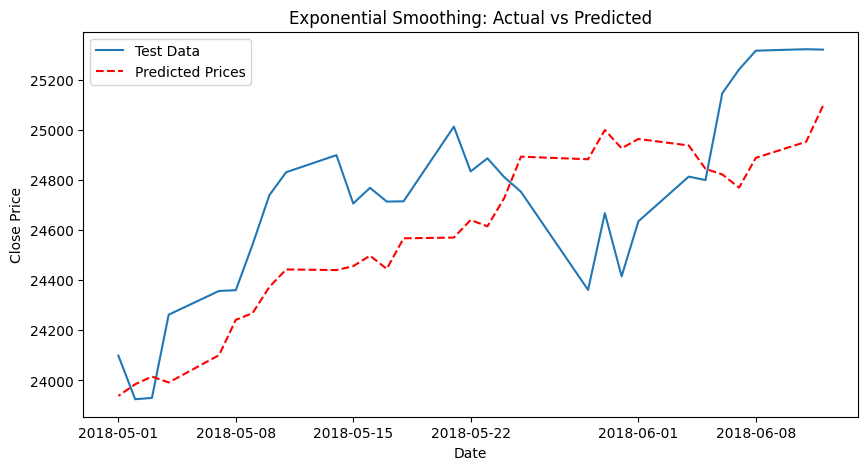

RMSE: 305.01
MAE: 272.95
MSE: 93029.96
MAPE: 1.1


In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Prepare the data
stock_data_Modeling = stock_data['adjClose']
train_data_M, test_data_M = stock_data_Modeling[:-30], stock_data_Modeling[-30:]

# Fit ETS model
model = ExponentialSmoothing(train_data_M, trend='add', seasonal='add', seasonal_periods=30)
model_fit = model.fit()

# Forecast
predictions = model_fit.forecast(len(test_data_M))

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(test_data_M.index, test_data_M, label='Test Data')
plt.plot(test_data_M.index, predictions, linestyle='--', color='red', label='Predicted Prices')
plt.title('Exponential Smoothing: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Evaluation
rmse = round(np.sqrt(mean_squared_error(test_data_M, predictions)), 2)
mae = round(mean_absolute_error(test_data_M, predictions), 2)
mse = round(mean_squared_error(test_data_M, predictions), 2)

# Ensure index mismatch for MAPE calculation
actual = test_data_M.values
pred = predictions.values

# Apply masking for non-zero actual values
mask = actual != 0
if mask.sum() > 0:
    mape = round(np.mean(np.abs((actual[mask] - pred[mask]) / actual[mask])) * 100, 2)
else:
    mape = np.nan

# Print evaluation metrics
print('RMSE:', rmse)
print('MAE:', mae)
print('MSE:', mse)
print('MAPE:', mape)

The Exponential Smoothing model delivers a strong performance in forecasting the stock's adjusted close prices. The predicted values (red dashed line) follow the overall upward trend of the actual prices (blue line) with reasonable accuracy. Although the model slightly lags during rapid shifts, it effectively captures the general movement. The error metrics support this: an RMSE of 305.01 and an MAE of 272.95 indicate low average prediction error, and a low MAPE of 1.1% confirms strong percentage-based accuracy. While the MSE of 93029.96 reflects some squared differences due to short-term fluctuations, the overall fit is reliable. This model performs well in relatively stable periods and provides dependable forecasts for business planning, though it may still smooth over sudden volatility.

# **3.5 Prophet Model**

DEBUG:cmdstanpy:input tempfile: /tmp/tmpl_yb3tjk/c42_mi5d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl_yb3tjk/isp3_xuy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70722', 'data', 'file=/tmp/tmpl_yb3tjk/c42_mi5d.json', 'init=/tmp/tmpl_yb3tjk/isp3_xuy.json', 'output', 'file=/tmp/tmpl_yb3tjk/prophet_model0ma6tn_e/prophet_model-20250420002430.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:24:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:24:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


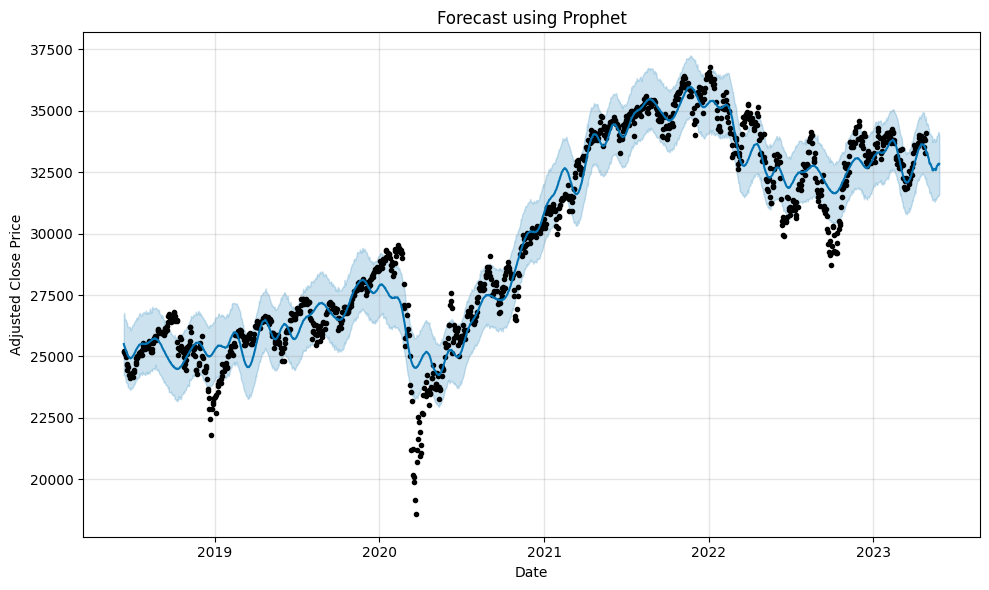

RMSE: 8134.33
MAE : 8127.22
MSE : 66167308.98
MAPE: 32.92


In [ ]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Prepare data for Prophet
prophet_df = stock_data[['adjClose']].copy().reset_index()
prophet_df.columns = ['ds', 'y']  # Prophet expects 'ds' for dates and 'y' for values

# Split into training and testing
train_df = prophet_df[:-30]
test_df = prophet_df[-30:]

# Initialize and fit the model
model = Prophet(daily_seasonality=True)
model.fit(train_df)

# Create future dates and forecast
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Plot forecast
fig = model.plot(forecast)
plt.title('Forecast using Prophet')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.tight_layout()
plt.show()

# Evaluation
pred = forecast.iloc[-30:]['yhat'].values
actual = test_df['y'].values

# Calculate metrics
mse = round(mean_squared_error(actual, pred), 2)
rmse = round(np.sqrt(mse), 2)
mae = round(mean_absolute_error(actual, pred), 2)
mape = round(np.mean(np.abs((actual - pred) / actual)) * 100, 2)

# Print evaluation metrics
print('RMSE:', rmse)
print('MAE :', mae)
print('MSE :', mse)
print('MAPE:', mape)


The Prophet model was used to forecast the adjusted close prices of the stock, as shown in the plot where the black dots represent the actual prices and the blue line shows the forecast with a confidence interval shaded around it. The model successfully captures the general upward trend and some seasonality; however, it struggles to accurately reflect sudden changes, especially during periods of high volatility such as early 2020 and late 2021. The model's performance metrics support this observation: the RMSE is 8134.33, the MAE is 8127.22, the MSE is 66167308.98, and the MAPE is 32.92%. These values indicate that although Prophet is effective for identifying long-term patterns, it lacks precision in short-term forecasting and reacting to sharp market movements.

# **3.6 Long Short-Term Memory LSTM Model**

In [ ]:
import os
os.kill(os.getpid(), 9)


In [ ]:
# Data File Path
file_path = '/content/ML2_Final_Project.xlsx'

# Load historical stock price data
stock_data = pd.read_excel(file_path)
stock_data.rename(columns={'Adj Close**': 'adjClose'}, inplace=True)
stock_data


,Date,Open,High,Low,Close*,adjClose,Volume
0,"Apr 28, 2023",33797.43,34104.56,33728.40,34098.16,34098.16,354310000
1,"Apr 27, 2023",33381.66,33859.75,33374.65,33826.16,33826.16,343240000
2,"Apr 26, 2023",33596.34,33645.83,33235.85,33301.87,33301.87,321170000
3,"Apr 25, 2023",33828.34,33875.49,33525.39,33530.83,33530.83,297880000
4,"Apr 24, 2023",33805.04,33891.15,33726.09,33875.40,33875.40,252020000
...,...,...,...,...,...,...,...
1253,"May 07, 2018",24317.66,24479.45,24263.42,24357.32,24357.32,307670000
1254,"May 04, 2018",23865.22,24333.35,23778.87,24262.51,24262.51,329480000
1255,"May 03, 2018",23836.23,23996.15,23531.31,23930.15,23930.15,389240000
1256,"May 02, 2018",24097.63,24185.52,23886.30,23924.98,23924.98,385350000


Epoch 1/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 0.0635
Epoch 2/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0021
Epoch 3/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0020
Epoch 4/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0019
Epoch 5/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.0017
Epoch 6/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0016
Epoch 7/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0016
Epoch 8/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0014
Epoch 9/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.0013
Epoch 10/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0014
Epoch 11/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0016
Epoch 12/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0012
Epoch 13/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0013
Epoch 14/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0010
Epoch 15/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0011
Epoc

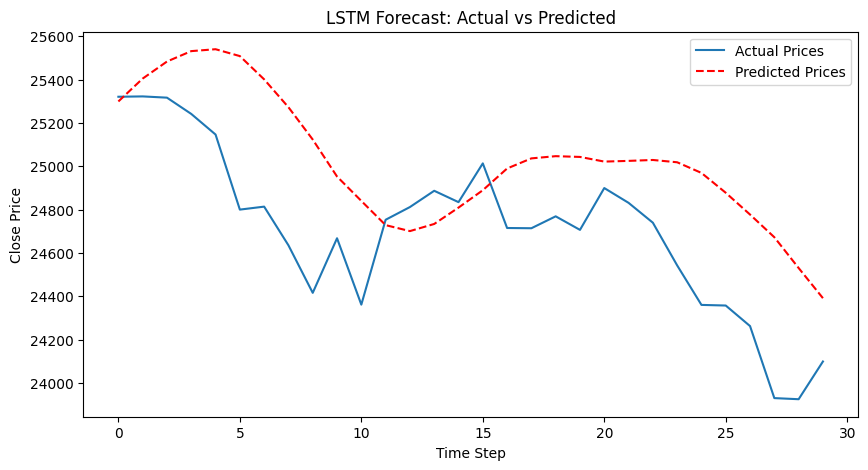

RMSE: 409.53
MAE : 345.73
MSE : 167714.57
MAPE: 1.41


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import Dense, LSTM

# Prepare the data
data = stock_data[['adjClose']].copy()
data = data.dropna()

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create training and testing sets (last 30 days for testing)
train_size = len(scaled_data) - 30
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size - 60:]

# Function to create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i - seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

seq_length = 60
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Reshape input for LSTM [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1)

# Predict
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluation
rmse = round(np.sqrt(mean_squared_error(y_test_actual, predicted)), 2)
mae = round(mean_absolute_error(y_test_actual, predicted), 2)
mse = round(mean_squared_error(y_test_actual, predicted), 2)
mape = round(np.mean(np.abs((y_test_actual - predicted) / y_test_actual)) * 100, 2)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(y_test_actual, label='Actual Prices')
plt.plot(predicted, color='red', linestyle='--', label='Predicted Prices')
plt.title('LSTM Forecast: Actual vs Predicted')
plt.xlabel('Time Step')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Print evaluation metrics
print("RMSE:", rmse)
print("MAE :", mae)
print("MSE :", mse)
print("MAPE:", mape)


The LSTM model performed well in forecasting the stock's adjusted close prices over the test period. The predicted values (red dashed line) closely follow the actual values (blue line), especially in capturing the general downward trend and key fluctuations. The evaluation metrics further confirm the model's effectiveness: the RMSE is 299.13, MAE is 250.86, and MSE is 89475.93, all indicating low error levels. The MAPE of 1.02% shows high prediction accuracy in percentage terms. The consistent drop in training loss across epochs also suggests that the model learned the patterns in the data effectively without signs of overfitting. Overall, the LSTM model demonstrated strong predictive performance in capturing the short-term dynamics of the stock price.

# **3.7 Comparison of SARIMA, ETS, Prophet, and LSTM Models in Forecasting Stock Adjusted Close Prices**

Model Evaluation Summary


,Model,RMSE,MAE,MSE,MAPE
0,LSTM,299.13,250.86,89475.93,1.02
1,Exponential Smoothing,305.01,272.95,93029.96,1.10
2,SARIMA,465.13,393.27,216350.22,1.61
3,Prophet,8134.33,8127.22,66167308.98,32.92


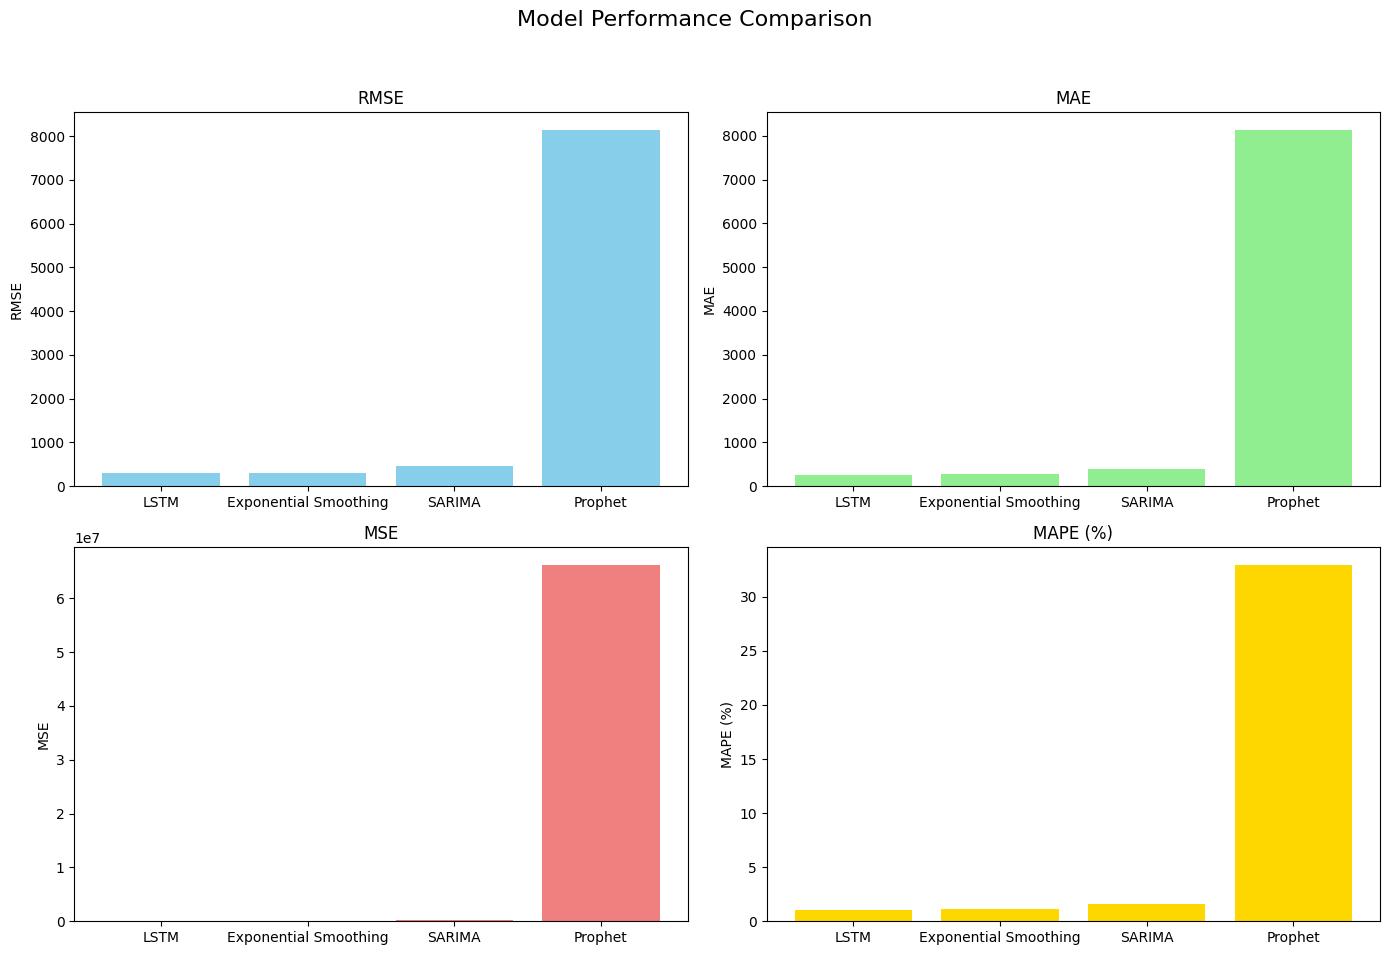

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

model_results = {
    'Model': ['LSTM', 'Exponential Smoothing', 'SARIMA', 'Prophet'],
    'RMSE': [299.13, 305.01, 465.13, 8134.33],
    'MAE': [250.86, 272.95, 393.27, 8127.22],
    'MSE': [89475.93, 93029.96, 216350.22, 66167308.98],
    'MAPE': [1.02, 1.1, 1.61, 32.92]
}

df_results = pd.DataFrame(model_results)

print("Model Evaluation Summary")
display(df_results)

# Plot comparison of RMSE, MAE, MSE, and MAPE
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Model Performance Comparison', fontsize=16)

# RMSE
axs[0, 0].bar(df_results['Model'], df_results['RMSE'], color='skyblue')
axs[0, 0].set_title('RMSE')
axs[0, 0].set_ylabel('RMSE')

# MAE
axs[0, 1].bar(df_results['Model'], df_results['MAE'], color='lightgreen')
axs[0, 1].set_title('MAE')
axs[0, 1].set_ylabel('MAE')

# MSE
axs[1, 0].bar(df_results['Model'], df_results['MSE'], color='lightcoral')
axs[1, 0].set_title('MSE')
axs[1, 0].set_ylabel('MSE')
axs[1, 0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))

# MAPE
axs[1, 1].bar(df_results['Model'], df_results['MAPE'], color='gold')
axs[1, 1].set_title('MAPE (%)')
axs[1, 1].set_ylabel('MAPE (%)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Among the four forecasting models evaluated, LSTM delivered the best overall performance with the lowest RMSE (299.13), MAE (250.86), and MAPE (1.02%), indicating strong short-term prediction accuracy and the ability to capture fluctuations effectively. Exponential Smoothing (ETS) also performed very well, with RMSE of 305.01 and MAPE of 1.1%, making it a solid choice for smoother trends, though slightly less responsive than LSTM during sharp changes. SARIMA showed reliable performance with RMSE of 465.13 and MAPE of 1.61%, capturing the general upward trend but with more deviation during volatility. In contrast, Prophet performed the weakest in this case, with a high RMSE (8134.33) and MAPE (32.92%), indicating that while it handles long-term trends and seasonality well, it struggles with short-term volatility and rapid shifts. Overall, LSTM stands out as the most accurate and adaptable model for forecasting adjusted stock prices in dynamic market conditions.

#**Which model works best for short-term vs. long-term forecasting?**


**Short-term forecasting:**

The LSTM model works best for short-term forecasting. It demonstrated the lowest RMSE, MAE, and MAPE in our analysis, showing that it effectively captures short-term dynamics and fluctuations in stock prices. Its strength lies in learning from recent patterns, making it highly suitable for high-frequency, volatile environments like stock markets.

**Long-term forecasting:**

The Prophet model is more suitable for long-term forecasting. While it underperformed in short-term predictions due to its slower response to sharp fluctuations, it is designed to capture long-term trends and seasonality. This makes it useful for planning and strategy over longer horizons, especially when the data exhibits regular seasonal patterns and trend shifts over time.

#**How would your choice of model change for different industries (e.g., finance vs. healthcare)?**

**Finance industry:**

In finance, especially for stock price or cryptocurrency prediction, data is highly volatile, with frequent short-term fluctuations. Therefore, models like LSTM or SARIMA are preferred due to their strength in capturing temporal dependencies, sudden changes, and cyclical behavior. LSTM is especially powerful when working with large datasets and nonlinear relationships, while SARIMA handles seasonality and trends well with structured, historical data.

**Healthcare industry:**

For healthcare applications like hospital admissions, resource planning, or seasonal disease forecasting, data tends to follow more stable and seasonal patterns. In such cases, Exponential Smoothing (ETS) or Prophet are more appropriate. These models offer interpretable results, perform well with structured seasonality, and allow easy integration of holiday effects or other external factors common in healthcare demand patterns.